IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER PRENDERE I FILE CSV PER LA CREAZIONE DEL DATAFRAME FINALE

In [2]:
path_file = os.path.abspath(os.getcwd()) #prendiamo il path in cui si trova il file su cui stiamo lavorando
print(path_file)
os.chdir(path_file) #cambiamo directory al fine di poter prendere i file csv per la creazione del dataframe

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


DATAFRAME CHE CONTERRA' I DATI DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi con estensione csv nella cartella path_file
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
df_1 = pd.DataFrame() #creazione di un dataframe vuoto

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    df_1 = df_1.append(df,ignore_index=True)

RIMOZIONE DI EVENTUALI DUPLICATI

In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

SHUFFLING DEL DATAFRAME

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      44.0 -0.044375   0.009316    0.643816   0.106119          0.0   
1      51.0 -0.063153   0.011140    0.432733   0.122884          0.0   
2      74.0 -0.040356   0.020050   -0.265077   0.147075         87.0   
3      41.0 -0.025716   0.007263   -0.552901   0.088915         89.0   
4      13.0 -0.035580   0.016914   -0.435153   0.134662         96.0   
...     ...       ...        ...         ...        ...          ...   
1344    1.0 -0.062231   0.011061    0.732446   0.122075          0.0   
1345   24.0 -0.056319   0.027730   -0.974320   0.175578          0.0   
1346   10.0 -0.034905   0.016930   -0.430255   0.134542        106.0   
1347   30.0 -0.005895   0.011636    2.504476   0.107891         61.0   
1348   54.0  0.006294   0.051563    2.459515   0.226882         87.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            84.0    9.292308    4.041106  0.052242  ...  1031

RIMOZIONE DELLA COLONNA RELATIVA AL TEMPO

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.044375   0.009316    0.643816   0.106119          0.0         84.0   
1    -0.063153   0.011140    0.432733   0.122884          0.0         68.0   
2    -0.040356   0.020050   -0.265077   0.147075         87.0        116.0   
3    -0.025716   0.007263   -0.552901   0.088915         89.0         66.0   
4    -0.035580   0.016914   -0.435153   0.134662         96.0         70.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.062231   0.011061    0.732446   0.122075          0.0        102.0   
1345 -0.056319   0.027730   -0.974320   0.175578          0.0        102.0   
1346 -0.034905   0.016930   -0.430255   0.134542        106.0         83.0   
1347 -0.005895   0.011636    2.504476   0.107891         61.0         83.0   
1348  0.006294   0.051563    2.459515   0.226882         87.0         86.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset mediante oversampling

In [7]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  390 Guasto 5%:  418 Guasto 10%:  541


In [8]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [9]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.044375   0.009316    0.643816   0.106119     0.000000    84.000000   
1    -0.063153   0.011140    0.432733   0.122884     0.000000    68.000000   
2    -0.040356   0.020050   -0.265077   0.147075    87.000000   116.000000   
3    -0.025716   0.007263   -0.552901   0.088915    89.000000    66.000000   
4    -0.035580   0.016914   -0.435153   0.134662    96.000000    70.000000   
...        ...        ...         ...        ...          ...          ...   
1618  0.002758   0.007346   -0.381161   0.085643     0.000000   101.665460   
1619 -0.028921   0.009998    2.119139   0.103966    83.680125    69.919945   
1620 -0.001909   0.007056   -0.250051   0.083924     0.000000   115.334455   
1621 -0.030076   0.009989    2.087742   0.104252    64.557738    85.115477   
1622  0.001790   0.007183   -0.323076   0.084671     0.000000   115.249470   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

In [10]:
guasto_10 = y[y['Guasto'] == 2]
no_guasto = y[y['Guasto'] == 0]
guasto_5 = y[y['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  541 Guasto 5%:  541 Guasto 10%:  541


# Selezione feature più importanti (mediante ANOVA)

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15)
[False False False False False False False False  True  True False  True
  True False  True False False False False  True False False False False
  True False False False  True False  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


SCORE DELLE FEATURES

In [12]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

   Input_Features     F_Score
28    freq1(AccX)  824.260891
12    freq1(GyrY)  821.015814
34     kurt(AccY)  802.798692
32       <>(AccY)  679.454279
30     amp1(AccX)  674.952150
78       amp1(C9)  634.326639
35      RMS(AccY)  608.729947
24       <>(AccX)  600.367193
8        <>(GyrY)  593.080986
31     amp2(AccX)  565.536257
79       amp2(C9)  490.150325
9       var(GyrY)  486.228107
11      RMS(GyrY)  467.758201
19      RMS(GyrZ)  466.862645
14     amp1(GyrY)  443.932238


In [13]:
#creazione di una lista in cui andiamo a mettere le feature che non sono state selezionate dal metodo ANOVA
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


RIMOZIONE DELLE FEATURE NON SELEZIONATE

In [14]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  RMS(GyrZ)  \
0     0.052242   0.004871   0.087110   109.000000    3.495227   0.122683   
1     0.012345   0.006205   0.079638   111.000000    5.044291   0.120959   
2     0.025053   0.007026   0.087389    95.000000    2.663149   0.187258   
3     0.046792   0.012529   0.121189   120.000000   19.161275   0.149352   
4    -0.008832   0.027984   0.167288     0.000000   29.415106   0.194644   
...        ...        ...        ...          ...         ...        ...   
1618  0.014721   0.005630   0.076370   107.189614    3.571040   0.158069   
1619 -0.008881   0.006093   0.078464   108.040028    7.094265   0.110808   
1620  0.012580   0.005230   0.073321   115.395483    2.664618   0.153394   
1621 -0.009032   0.006046   0.078181   109.904168    7.563864   0.110609   
1622  0.014326   0.005468   0.075230   108.209305    3.538317   0.156261   

      <>(AccX)  freq1(AccX)  amp1(AccX)  amp2(AccX)  <>(AccY)  kurt(AccY)  \
0    -0.02

### Separazione del dataset in training e test

In [15]:
# Random state
rs = 42

# split del dataset in training (80%) e test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# dimensioni degli insiemi di training e test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 15)
(325, 15)
(1298, 1)
(325, 1)


DEFINIZIONE DEI CLASSIFICATORI CHE VERRANNO POI UTILIZZATI PER CLASSIFICARE I DATI

In [24]:
from sklearn.calibration import CalibratedClassifierCV

# Lista dei classificatori:
classifiers = [
    LogisticRegression(random_state = rs,multi_class='ovr'),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    SVC(probability=True), #Support Vector Machine
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

clf_name = [] # nomi dei classificatori
model_results = pd.DataFrame.copy(y_test) #risultato della predizione dal modello

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores della cross-validation
cv_acc = [] # accuratezza media della cross-validation, da massimizzare
cv_std = [] # deviazione standard della cross-validation, ma minimizzare

cnfm = [] #matrici di confusione
clr = [] #report della classificazione

### CLASSIFICAZIONE

Cross-Validation: [0.89230769 0.88923077 0.84923077 0.93518519 0.87037037]
Accuracy: 0.88 	 ---> LogisticRegression 


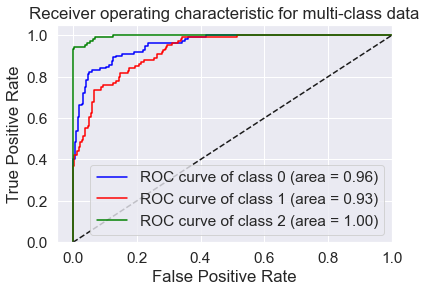

----------------------------------------------------
Cross-Validation: [0.66153846 0.65846154 0.65538462 0.65123457 0.66049383]
Accuracy: 0.65 	 ---> DecisionTreeClassifier 


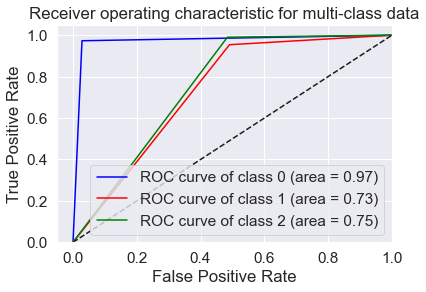

----------------------------------------------------
Cross-Validation: [0.93538462 0.96615385 0.94461538 0.94753086 0.94753086]
Accuracy: 0.95 	 ---> RandomForestClassifier 


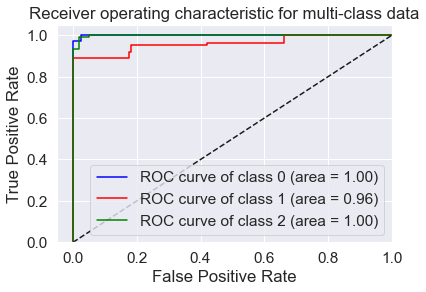

----------------------------------------------------
Cross-Validation: [0.68307692 0.67384615 0.63076923 0.69753086 0.65740741]
Accuracy: 0.67 	 ---> SVC 


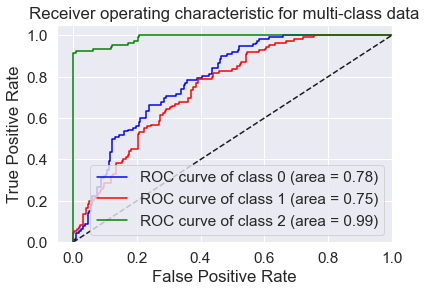

----------------------------------------------------
Cross-Validation: [0.88       0.93846154 0.89230769 0.73148148 0.91358025]
Accuracy: 0.91 	 ---> MLPClassifier 


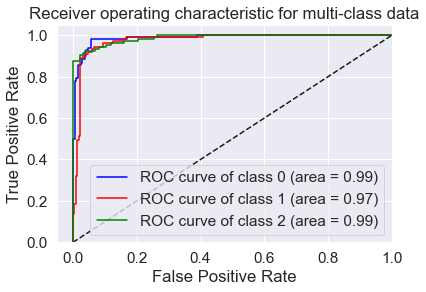

----------------------------------------------------
Cross-Validation: [0.67384615 0.66153846 0.75076923 0.74382716 0.62037037]
Accuracy: 0.63 	 ---> SGDClassifier 


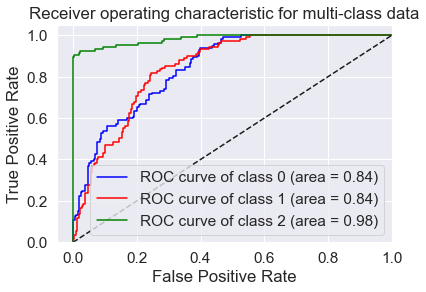

----------------------------------------------------


In [25]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3 # numero di classi in cui andremo a classificare

j=0
# training degli algoritmi e risultati
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting del modello e predizione
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    
    cv_results.append(cross_val_score(clf, x, y, scoring = "accuracy",cv = kfold)) # cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    print(f'Cross-Validation: {cross_val_score(clf, x, y, scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, classification report
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))

    # procedimento per la costruzione della curva ROC a tre classi
    if (j == 1) | (j == 2) | (j == 4):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### MATRICI DI CONFUSIONE

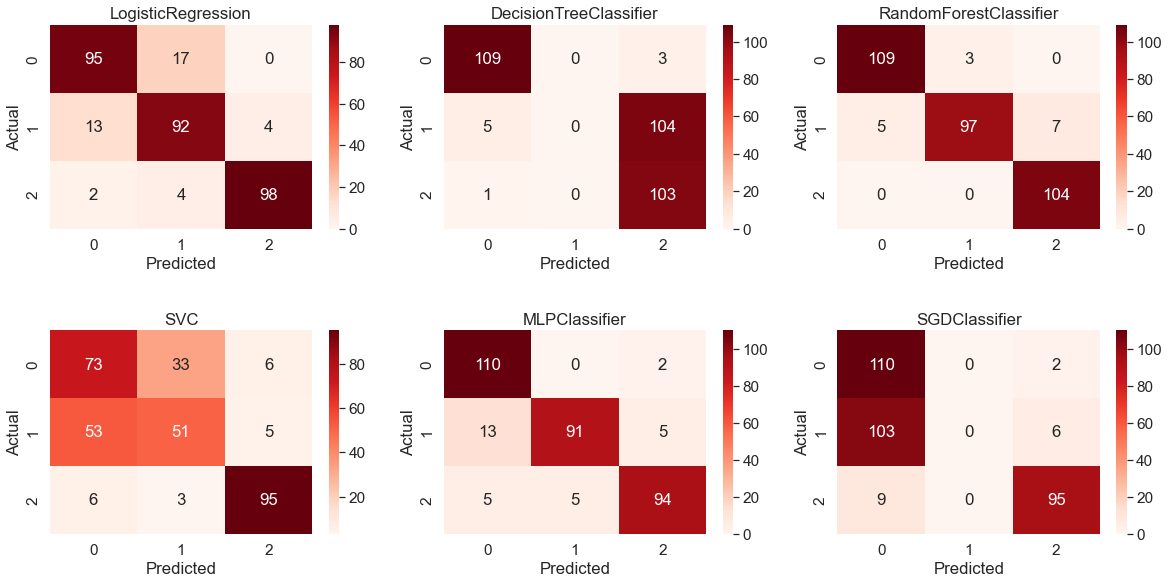

In [26]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1)
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

CROSS VALIDATION SCORES

Text(0.5, 1.0, 'Cross validation scores')

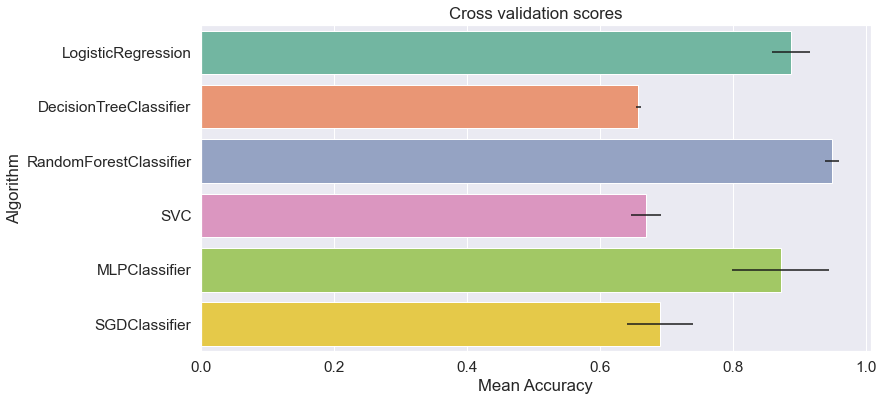

In [27]:
# Grafico per l'analisi dell'accuratezza media ed errore risultante dalla cross-validation
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

### REPORT CLASSIFICAZIONE

In [28]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       112
           1       0.81      0.84      0.83       109
           2       0.96      0.94      0.95       104

    accuracy                           0.88       325
   macro avg       0.88      0.88      0.88       325
weighted avg       0.88      0.88      0.88       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       112
           1       0.00      0.00      0.00       109
           2       0.49      0.99      0.66       104

    accuracy                           0.65       325
   macro avg       0.48      0.65      0.54       325
weighted avg       0.48      0.65      0.54       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      